## Business Understanding

## Data Understanding
- ID: number to represent patient ID
- PRG: Plasma glucose
- PL: Blood Work Result-1 (mu U/ml)
- PR: Blood Pressure (mm Hg)
- SK: Blood Work Result-2 (mm)
- TS: Blood Work Result-3 (mu U/ml)
- M11: Body mass index (weight in kg/(height in m)^2
- BD2: Blood Work Result-4 (mu U/ml)
- Age: patients age (years)
- Insurance: If a patient holds a valid insurance card
- Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

#### Null Hypothesis
- There is a relationship between a patients body mass index and their blood pressure

#### Alternate Hypothesis
- There is no relationship between a patients body mass index and their blood pressure

Analytical Questions
- Does a patient having an insurance influence their chances of developing a sepsis?
- What age group are more likely to develop Sepsis in ICU?
- Is there a relationship between plasma glucose and body mass index?


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px

In [3]:
## Loading the dataset

df = pd.read_csv("Paitients_Files_Train.csv")
df.head(10)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
5,ICU200015,5,116,74,0,0,25.6,0.201,30,1,Negative
6,ICU200016,3,78,50,32,88,31.0,0.248,26,0,Positive
7,ICU200017,10,115,0,0,0,35.3,0.134,29,1,Negative
8,ICU200018,2,197,70,45,543,30.5,0.158,53,1,Positive
9,ICU200019,8,125,96,0,0,0.0,0.232,54,1,Positive


In [4]:
## Checking missing values
df.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [5]:
##checking for duplicates
df.duplicated().sum()

np.int64(0)

#### Exploratory Data Analysis


In [6]:
##checking info on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [7]:
##checking the stats for the various columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,599,599,ICU200608,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRG,599.0,NaN,NaN,NaN,3.824708,3.362839,0.0,1.0,3.0,6.0,17.0
PL,599.0,NaN,NaN,NaN,120.153589,32.682364,0.0,99.0,116.0,140.0,198.0
PR,599.0,NaN,NaN,NaN,68.732888,19.335675,0.0,64.0,70.0,80.0,122.0
SK,599.0,NaN,NaN,NaN,20.562604,16.017622,0.0,0.0,23.0,32.0,99.0
TS,599.0,NaN,NaN,NaN,79.460768,116.576176,0.0,0.0,36.0,123.5,846.0
M11,599.0,NaN,NaN,NaN,31.920033,8.008227,0.0,27.1,32.0,36.55,67.1
BD2,599.0,NaN,NaN,NaN,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,NaN,NaN,NaN,33.290484,11.828446,21.0,24.0,29.0,40.0,81.0
Insurance,599.0,NaN,NaN,NaN,0.686144,0.464447,0.0,0.0,1.0,1.0,1.0


Text(0.5, 1.0, 'Distribution of Sepsis column')

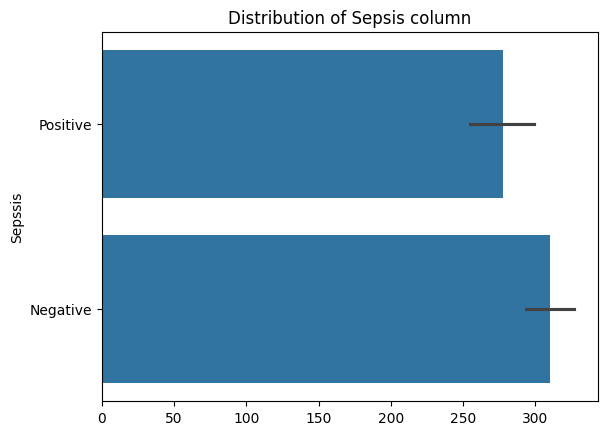

In [8]:
## plotting a bar chart of the sepsis column
sns.barplot(df["Sepssis"])
plt.title("Distribution of Sepsis column")

Observation
- We can see that most of the columns are not normally distributed since the mean and median values are not so close
- Also we need to take note of the imbalanced dataset, that is, Sepssis column has more negatives than positives and this could affect our models prediction is being biased toward one side of the dataset

In [9]:
##dropping the column ID
df = df.drop(columns="ID")

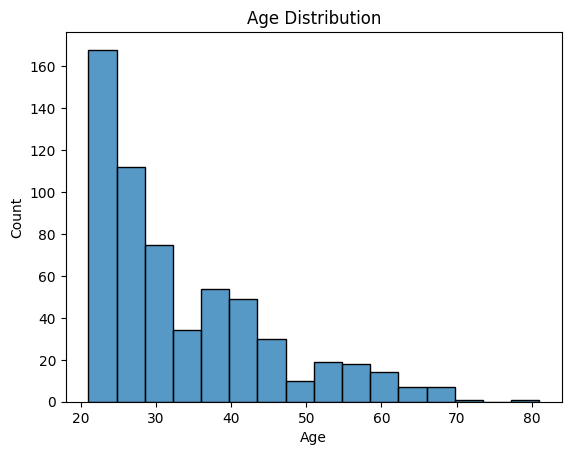

In [10]:
##checking the Age distribution
sns.histplot(df["Age"])
plt.title("Age Distribution")
plt.show()

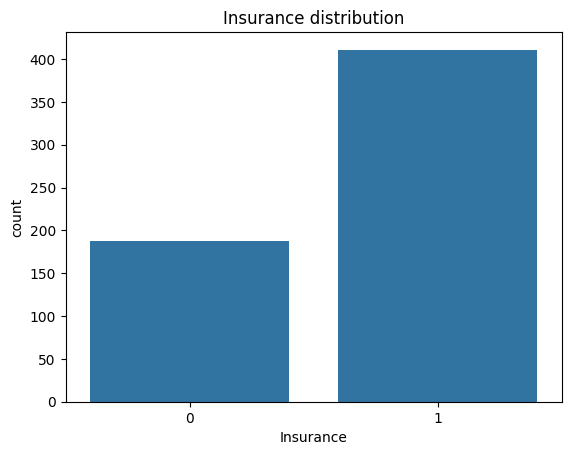

In [11]:
sns.barplot(df["Insurance"].value_counts())
plt.title("Insurance distribution")
plt.show()

In [12]:
df.head(10)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive
5,5,116,74,0,0,25.6,0.201,30,1,Negative
6,3,78,50,32,88,31.0,0.248,26,0,Positive
7,10,115,0,0,0,35.3,0.134,29,1,Negative
8,2,197,70,45,543,30.5,0.158,53,1,Positive
9,8,125,96,0,0,0.0,0.232,54,1,Positive


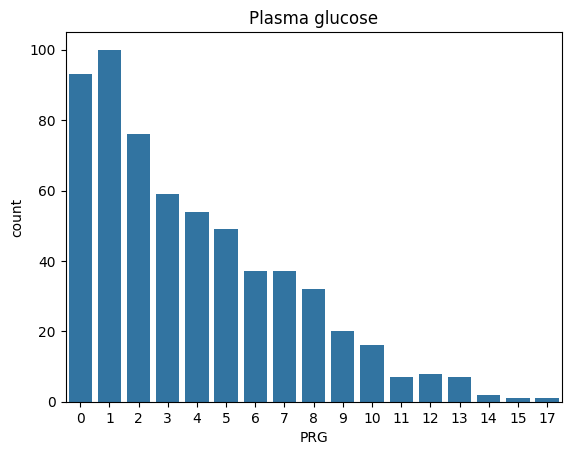

In [13]:
sns.barplot(df["PRG"].value_counts())
plt.title("Plasma glucose")
plt.show()

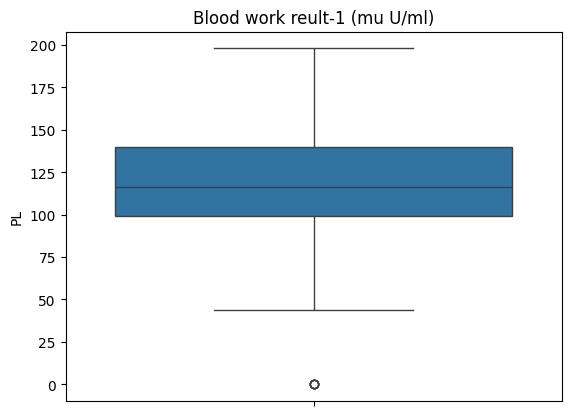

In [14]:
sns.boxplot(df["PL"])
plt.title("Blood work reult-1 (mu U/ml)")
plt.show()

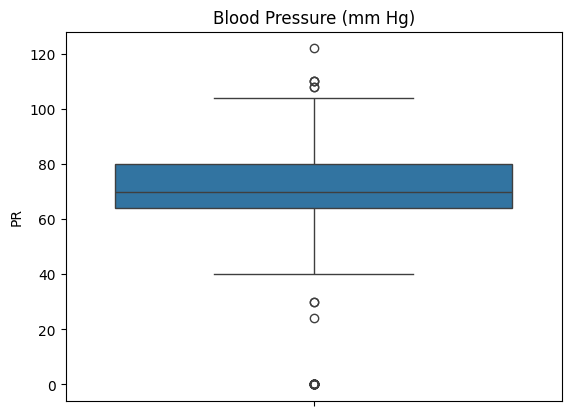

In [15]:
sns.boxplot(df["PR"])
plt.title("Blood Pressure (mm Hg)")
plt.show()

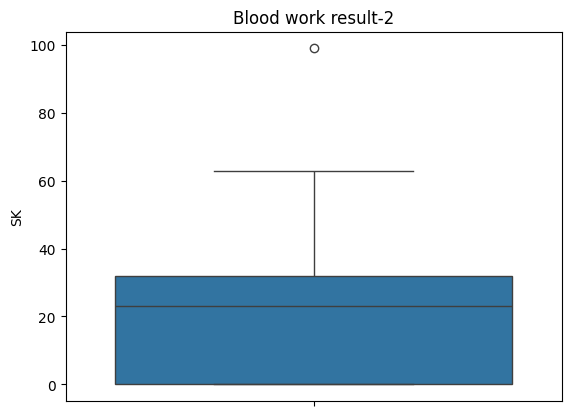

In [16]:
sns.boxplot(df["SK"])
plt.title("Blood work result-2")
plt.show()

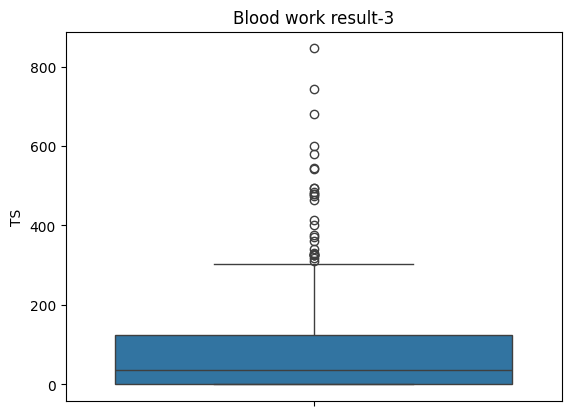

In [17]:
sns.boxplot(df["TS"])
plt.title("Blood work result-3")
plt.show()

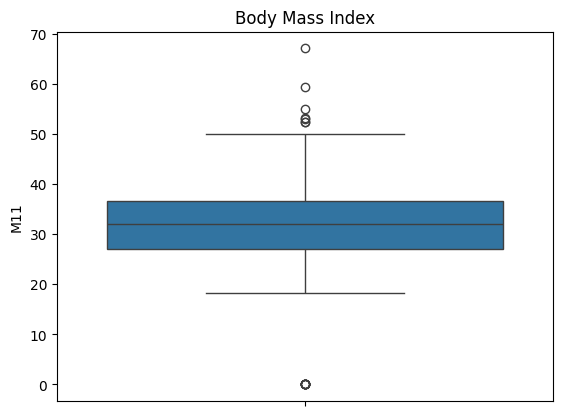

In [18]:
sns.boxplot(df["M11"])
plt.title("Body Mass Index")
plt.show()

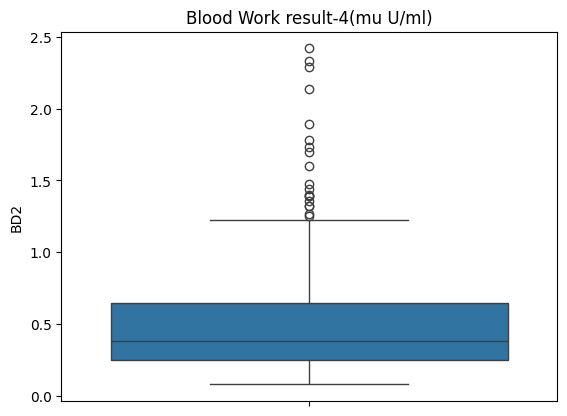

In [19]:
sns.boxplot(df["BD2"])
plt.title("Blood Work result-4(mu U/ml)")
plt.show()

##### Key Observations
- Majority of the patients have insurance
- All the blood work results seem to have outliers (We might have to truncate it or set a lower and upper bound for model efficiency)
- Majority of the patients are in their 20s and the number of patients reduces as age increases

#### Answering analytical questions


1. - Does a patient having an insurance influence their chances of developing a sepsis?

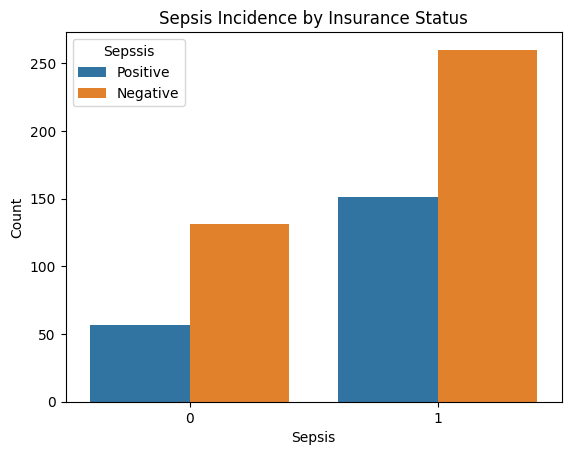

In [20]:
sns.countplot(data=df, x="Insurance", hue="Sepssis")
plt.xlabel('Sepsis')
plt.ylabel('Count')
plt.title('Sepsis Incidence by Insurance Status')
plt.show()


- What age group are more likely to develop Sepsis in ICU?

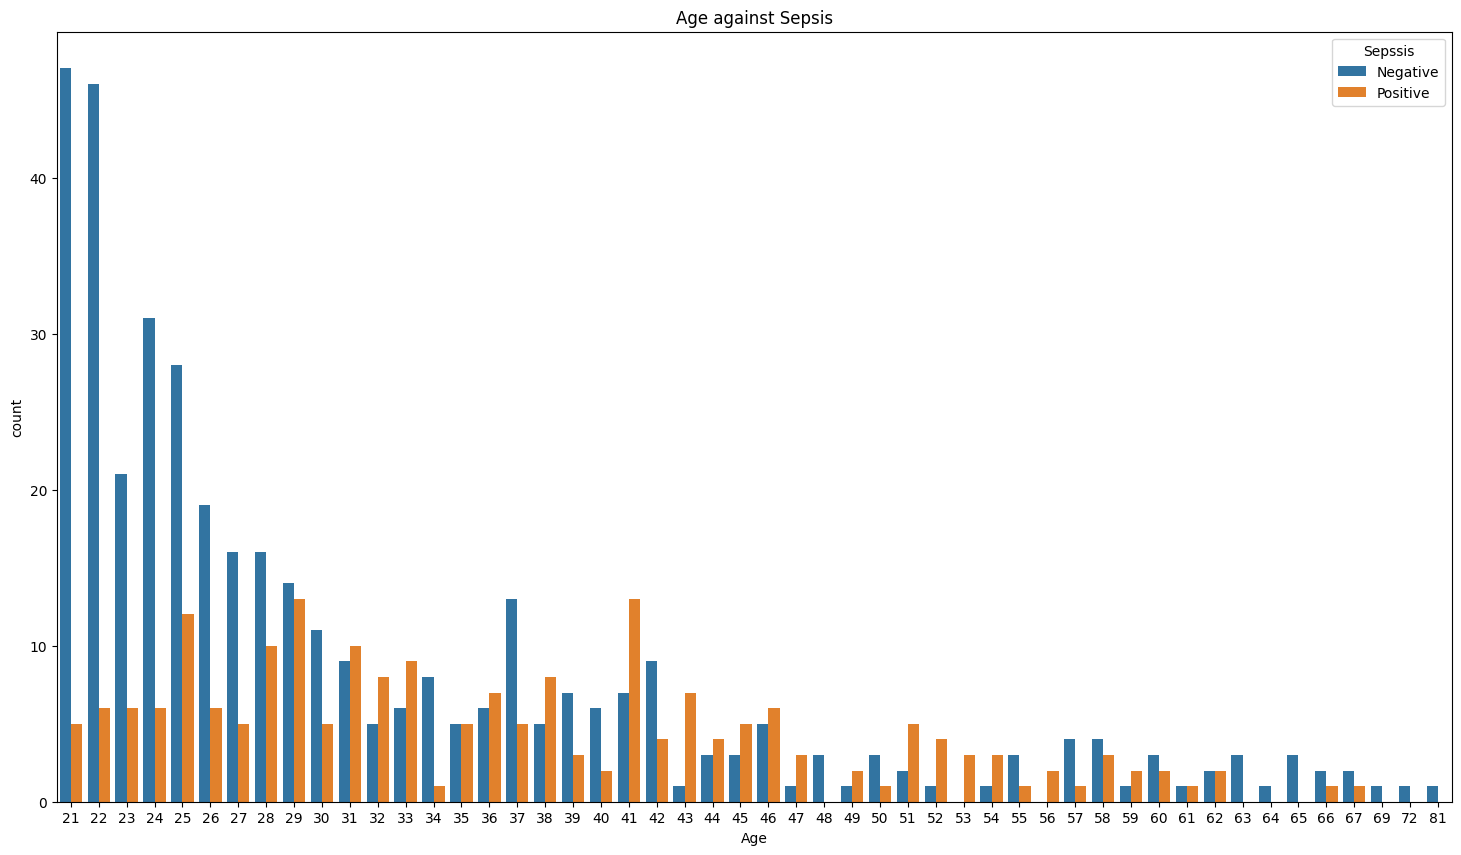

In [25]:
fig = plt.figure(figsize=(18,10))
sns.countplot(data=df, x="Age", hue="Sepssis")
plt.title("Age against Sepsis")
plt.show()

In [22]:
df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive
